In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Perceptions

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # Petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

print(y_pred)


[1]


In [23]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
print(x0.shape)
# print(x0[:4, :4])

print(x1.shape)
# print(x1[:4, :4])

print(x0.ravel().shape)
print(x1.ravel().shape)
# Concatenation along the second axis (column!)
X_new = np.c_[x0.ravel(), x1.ravel()]
print(X_new[:8, :])
print(f"X_new shape:{X_new.shape}")
y_pred = per_clf.predict(X_new)

zz = y_pred.reshape(x0.shape)


(200, 500)
(200, 500)
(100000,)
(100000,)
[[0.         0.        ]
 [0.01002004 0.        ]
 [0.02004008 0.        ]
 [0.03006012 0.        ]
 [0.04008016 0.        ]
 [0.0501002  0.        ]
 [0.06012024 0.        ]
 [0.07014028 0.        ]]
X_new shape:(100000, 2)


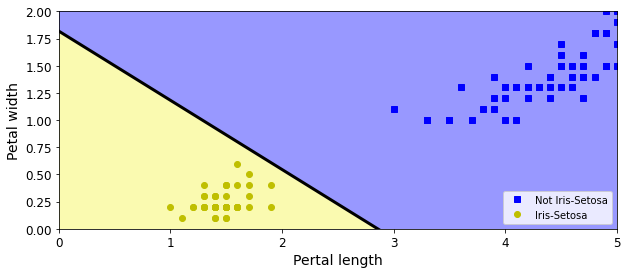

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#9898ff", "#fafab0"])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.axis(axes)
plt.xlabel("Pertal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend()

plt.show()


## Activation Functions

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def relu(z):
    return np.maximum(0, z)


def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)


(200,)


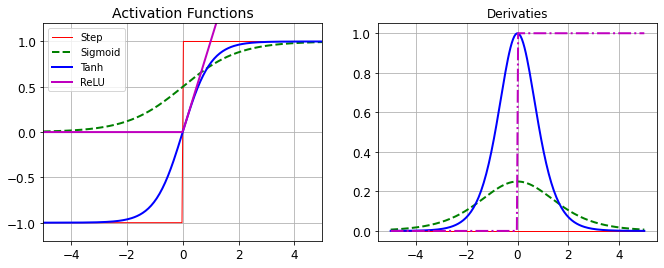

In [39]:
z = np.linspace(-5, 5, 200)
print(z.shape)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU")

plt.grid(True)
plt.legend()
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")

plt.grid()
plt.title("Derivaties")

plt.show()


## Building an Image Classifier

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [43]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [44]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

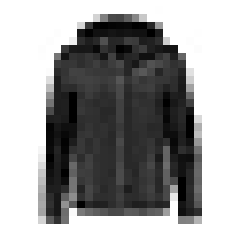

In [45]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [48]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

print(X_valid.shape)
print(X_test.shape)

assert class_names[y_train[0]] == "Coat"


(5000, 28, 28)
(10000, 28, 28)


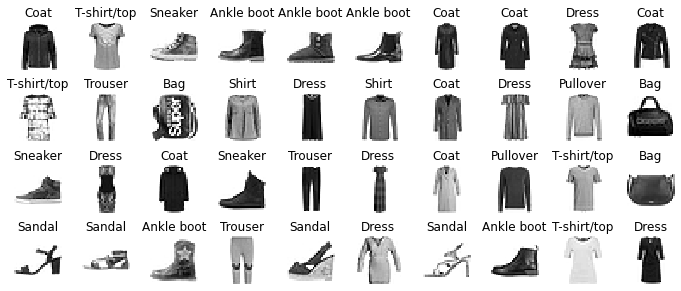

In [49]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [53]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# Output layer, should be classified into 10 classes
model.add(keras.layers.Dense(10, activation="softmax"))

print("")


In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
print("* Layers of the model: ")
print(model.layers)

print("* Summary of the model:")
print(model.summary())

* Layers of the model: 
[<keras.layers.core.flatten.Flatten object at 0x7f9a1e0b3a90>, <keras.layers.core.dense.Dense object at 0x7f9a1ddec100>, <keras.layers.core.dense.Dense object at 0x7f9a1e0b2a10>, <keras.layers.core.dense.Dense object at 0x7f9a1df793c0>]
* Summary of the model:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable p

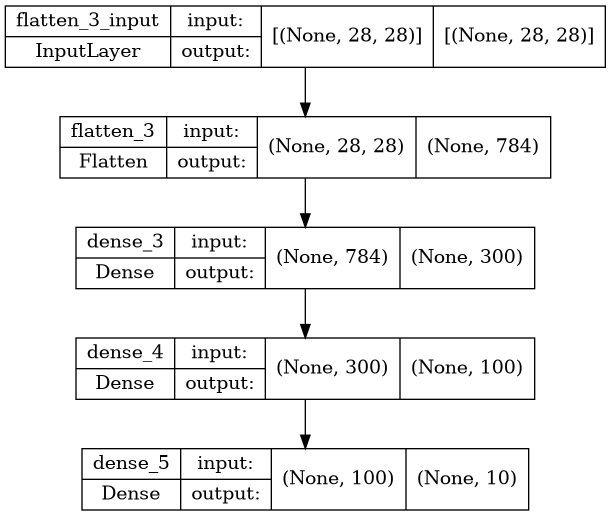

In [60]:
keras.utils.plot_model(model, "./images/my_fashion_mnist_model.png", show_shapes=True)


In [66]:
hidden1 = model.layers[1]
print(hidden1.name)

weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

dense_3
(784, 300)
(300,)


In [67]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)


In [68]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7217 - accuracy: 0.7654 - val_loss: 0.5132 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4893 - accuracy: 0.8284 - val_loss: 0.4361 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4430 - accuracy: 0.8438 - val_loss: 0.5261 - val_accuracy: 0.8004
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4160 - accuracy: 0.8539 - val_loss: 0.3969 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8601 - val_loss: 0.3805 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8653 - val_loss: 0.3755 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3667 - accuracy: 0.8700 - val_loss: 0.3665 - val_accuracy:

In [70]:
print(history.params)

print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


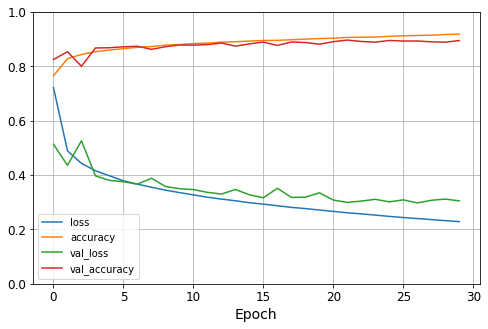

In [72]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.gca().set_xlabel("Epoch")
plt.show()

In [73]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8812


[0.34113603830337524, 0.8812000155448914]

In [77]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)

ret = np.array(class_names)[y_pred]
print(ret)


[[0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.96]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


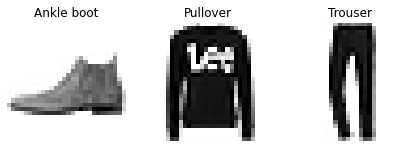

In [78]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


## Regression MLP